<a href="https://colab.research.google.com/github/kellyl2/NLP_CourseWork/blob/main/MSDS453_LCK_Discussion_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Week 3 - Discussion</h1>
<b>MSDS 453 - NLP - Discussion 03 </b>
<ul>
<li><b>Student:</b> Lindsay Kelly </li>
<li><b>Student Reference:</b> LCK </li>
<li><b>Movie Assigned:</b> Taken</li>
</ul>
<p> <b>Goal</b>
<ul>
<li>Look at key terms in your own documents, and select at least three for investigation,</li>
<li>Look at related key terms within the tf-idf list (produced using the code in github we will provide)</li>
<li>Look for related terms in other documents</li>
<li>Roughly chunk together the various terms that seem more-or-less related; this is not to be comprehensive, but rather to identify major themes/topics that seem to be addressed. </li>
</ul>
</ol>

In [48]:

try:
  import ipynb
except:
  !pip install ipynb
  import ipynb

try:
  import rake_nltk
except:
  !pip install rake_nltk
  import rake_nltk

try:
  import keras
except:
  !pip install keras
  import keras

try:
  import tensorflow
except:
  !pip install tensorflow
  import tensorflow
!pip install dandelion-eu
!pip install ipynb

  Preparing metadata (setup.py) ... done
  Created wheel for dandelion-eu: filename=dandelion_eu-0.3.3-py3-none-any.whl size=14393 sha256=fec365e958f57723f67f30b4a286e82d3784bfb68a26e8d1416e74e7ef169f83
  Stored in directory: /root/.cache/pip/wheels/0b/16/f1/35119c186b71e2175be4c859f29ff44b81b230c8a45c5c0541
Successfully built dandelion-eu


In [2]:
!pip install gensim

In [200]:
import pandas as pd


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams, FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from rake_nltk import Rake
import re
import unicodedata
import pandas as pd
import os
from google.colab import drive, userdata
import json
from collections import Counter
from pydantic import BaseModel, Field
from typing import List, Optional, Dict, Any
import ipynb
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.corpora import Dictionary
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from dandelion import DataTXT
import ipynb
import requests


from sklearn.manifold import TSNE
from keras.models import Model
from keras.layers import Input, Dense, Reshape
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
import tensorflow as tf

In [51]:
## indicator variable that will pull from APIs if True
## will import from saved json files if False
dev = True

In [6]:
## load working area
drive.mount('/content/drive', force_remount=True)

# environment references
destination_folder= userdata.get('assignment_folder')
discussion_folder= userdata.get('destination_folder')
data_folder= userdata.get('data_folder')

Mounted at /content/drive


<p>
<b>Defined functions:</b>
<ul>
<li><b>get_cleaned_text(text)</b><br>
input: string<br>
returns: string<br>
- regex substitute string to return only alhpa characters and numeric values (removes all punctuation)<br>
- transforms the text case to lower case<br>
- strips any leading or trailing spaces</li>
<li><b>get_lemmatize_text(text, text_type = str)</b><br>
input types: string, list<br>
returns: list of lemmatized text<br>
- WordNetLemmatizer from NLTK
</li>
<li><b>get_stem_text(text, text_type = str)</b><br>
input types: string, list<br>
returns: list of stemmed text<br>
- PorterStemmer from NLTK
</li>
<li><b>preprocess_text(text, lemma = True, stem = False, custom_stopwords = [], output = str)</b><br>
input types: string, list<br>
returns: string, list<br>
- loops through sentences <br>
- runs text processing (stem, lemma) to standardize text across documents<br>
- removes stop words (including custom stop words)<br>
- cleans the results using <i> get_cleaned_text</i><br>
- returns the results in either tokenized work lists OR a single text string
</li>
</ul>

In [7]:
def check_terms_in_df(df, term_list, alias_terms = {}, col_text = 'MovieReview_normalized'):
  """returns a dataframe that summarizes the frequence of a list of terms in a dataset"""
  results = {}
  for f in df['FileName']:
    docfile = f
    reference = f[4:9].replace("_", "")
    results[reference] = {}
    for t in term_list:
      text = df[col_text].loc[df['FileName']==f].to_list()[0]
      if t in text:
        results[reference][t] = text.count(t)
      else:
        results[reference][t] = 0


  df_results = pd.DataFrame.from_dict(results)
  df_results['TotalTerms'] = df_results.sum(axis=1, numeric_only=True)

  df_results.sort_values(by='TotalTerms', ascending = False, inplace=True)
  df_results = df_results.reset_index()
  df_results.rename(columns={'index':'Term'}, inplace=True)
  df_results = df_results.fillna(0)
  if alias_terms != {}:
    df_results['alias_terms'] = df_results['Term'].apply(lambda x: alias_terms[x] if x in alias_terms else x)
  df_output = df_results.loc[df_results['TotalTerms']>=1]
  return df_output

In [8]:
## generate heatmap of document correlation matrix
## masked to show the top half of the matrix to increase legibility
def generate_masked_heatmap(matrix, term_list=[], c = {'masked':True, 'include_labels':True, 'figsize':(8,8), 'title':"Heatmap of Movie Reviews"} ):

  if 'figsize' not in c:
    c['figsize'] = (8,8)

  if 'title' not in c:
    c['title'] = "Heatmap of Movie Reviews"

  if 'cmap' not in c:
    c['cmap'] = 'viridis'

  if 'v_update' not in c:
    c['v_update'] = (np.min(matrix), np.max(matrix))

  if 'include_labels' not in c:
    c['include_labels'] = True

  if 'labelbottom' not in c:
    c['labelbottom'] = True

  if 'axis_labels' not in c:
    c['axis_labels'] = "Movie Review"


  ## generate the masked matrix
  mask = np.zeros_like(matrix, dtype = bool)
  mask[np.triu_indices_from(mask)] = True
  if 'masked' not in c:
    masked_data = np.ma.array(matrix, mask=mask)
  elif c['masked'] == False:
      masked_data = np.ma.array(matrix)
  else:
      masked_data = np.ma.array(matrix, mask=mask)



  ## generate the plot
  fig, ax1 = plt.subplots(1, 1, figsize=c['figsize'])
  sp = ax1.imshow(masked_data, cmap=c['cmap'], origin='lower', vmin=c['v_update'][0], vmax=c['v_update'][1])

  ## generate the document labels
  min_tick = 0
  max_tick = masked_data.shape[0] # Round up to ensure max is included if needed
  desired_ticks = np.arange(min_tick, max_tick)

  fig.colorbar(sp, label='Similarity', ax=ax1, shrink=0.7, aspect=20)
  plt.title(c['title'], fontdict={'fontsize': 14, 'fontweight': 'bold'})
  ax1.set_ylabel(c['axis_labels'] , fontdict={'fontsize': 10, 'fontweight': 'bold'})
  ax1.set_xlabel(c['axis_labels'] , fontdict={'fontsize': 10, 'fontweight': 'bold'})

  # Add text annotations for values
  if 'include_labels' in c:
    if c['include_labels'] == False:
      pass
    else:
      for i in range(masked_data.shape[0]):
          for j in range(masked_data.shape[1]):
            ax1.text(j, i, masked_data[i, j].round(2), ha='center', va='center', color='w', fontdict={'fontsize': 6, 'fontweight': 'bold'})

  if len(term_list)>0:
    labels = term_list
  else:
    labels = [f"{int(num)+1}" for num in range(max_tick)]

  ax1.set_yticks(desired_ticks)
  ax1.set_yticklabels(labels=labels, fontdict={'fontsize': 8}, ha='right')

  if 'labelbottom' in c:
      if c['labelbottom'] == False:
        pass
      else:
        ax1.set_xticks(desired_ticks)
        ax1.set_xticklabels(labels=labels, fontdict={'fontsize': 8}, rotation=-45, ha='left')
  else:
      ax1.set_xticks(desired_ticks)
      ax1.set_xticklabels(labels=labels, fontdict={'fontsize': 8}, rotation=-45, ha='left')

  fig.tight_layout()
  return fig

In [9]:
###############################################################################
### Processing text into lists
###############################################################################
def get_corpus(df, title = 'Taken', doc_id = 'FileName', text_col = 'MovieReview_normalized'):
    num_records = df.shape[0]
    #create empty list to store text documents titles
    titles=[]
    docids=[]
    #for loop which appends the DSI title to the titles list
    for i in range(num_records):
      try:
        docids.append(df[title].iloc[i])
      except:
        docids.append(title)

    #for loop which appends the DSI title to the titles list
    for i in range(num_records):
      #titles.append(title)
      titles.append(df[doc_id].iloc[i])

    #create empty list to store text documents
    text_body=[]

    #for loop which appends the text to the text_body list
    for i in range(num_records):
        temp_text=df[text_col].iloc[i]
        text_body.append(temp_text)
    return (docids,titles,text_body)

In [10]:
def get_cleaned_text(text , text_type = str):
  """simple data cleaning - remove the special characters and convert to lower case"""
  cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  cleaned_text = cleaned_text.lower()
  cleaned_text = cleaned_text.rstrip()
  cleaned_text = cleaned_text.lstrip()
  if text_type == str:
    return cleaned_text
  else:
    return cleaned_text.split()

def get_lemmatize_text(text, text_type = str):
  lemmatizer = WordNetLemmatizer()
  if text_type == str:
    text = text.split()
  return [lemmatizer.lemmatize(word) for word in text]

def get_stem_text(text, text_type = str):
  stemmer = PorterStemmer()
  if text_type == str:
    text = text.split()
  return [stemmer.stem(word) for word in text]

def preprocess_text(text, lemma = True, stem = False, custom_stopwords = [], output = str):
  stop_words = set(stopwords.words('english'))
  if custom_stopwords != []:
    stop_words.update(custom_stopwords)
  if type(text) == str:
    text_string = [text.split(".")]
  else:
    text_string = text

  cleaned_sentences = []
  for i,sentences in enumerate(text_string):
    for j,sentence in enumerate(sentences):
      if lemma:
        output_type = list if type(output) == list else str
        sentence = get_lemmatize_text(sentence, text_type = output_type)
      if stem:
        output_type = list if type(output) == list else str
        sentence = get_stem_text(sentence, text_type = output_type)


      cleaned_s = [get_cleaned_text(token) for token in sentence if token not in stop_words and len(token)>2]
      cleaned_sentences.append(cleaned_s)

  flat_list = [item for sublist in cleaned_sentences for item in sublist]
  if output == list:
    return flat_list
  else:
    ## expects words in a single phrase
    phrase = " ".join(flat_list)
    phrase = re.sub(r'\s+', ' ', phrase)
    tokens = get_cleaned_text(phrase)  # Tokenize and remove punctuation
    return tokens

In [210]:
###############################################################################
### Calculates TFIDF
## source: Dimensionality Reduction v7
## author: Jennifer Sleeman
###############################################################################


def get_tfidf_results(text, df = None, top_k_results = None,
                      limited_list = [], custom_vocab = None,
                      c_stop_words = None):
  if c_stop_words != None:
    stopwords = c_stop_words
  else:
    stopwords = 'english'

  if custom_vocab != None:
    vectorizer = TfidfVectorizer(stop_words=stopwords, use_idf=True,
                               ngram_range=(1,1), norm=None)
  else:
    vectorizer = TfidfVectorizer(stop_words=stopwords, use_idf=True,
                               ngram_range=(1,1), norm=None,
                                 vocabulary=custom_vocab)
  vectorizer.vocabulary_ = custom_vocab
  transformed_documents = vectorizer.fit_transform(text)

  transformed_documents_as_array = transformed_documents.toarray()
  doc_term_matrix = transformed_documents.todense()
  processed_list = vectorizer.get_feature_names_out()

  doc_term_df = pd.DataFrame(doc_term_matrix,
                               columns=processed_list,
                               index=df.Doc_ID)

  tfidf = pd.DataFrame(doc_term_df.sum().sort_values(ascending=False)).reset_index(drop=False)
  tfidf.columns = ['Term', 'Total TF-IDF']
  tfidf['doc_count'] = tfidf['Term'].apply(lambda x: custom_vocab.dfs[custom_vocab.token2id.get(x)])
  tfidf['mean_tf_idf_scores'] = tfidf['Total TF-IDF']/tfidf['doc_count']
  tfidf['mean_tf_idf_corpus'] = tfidf['Total TF-IDF']/df.shape[0]
  sorted_tfidf = tfidf.sort_values(by='mean_tf_idf_corpus', ascending=False).reset_index(drop=True).round(3)
  if len(limited_list)>0:
    results = sorted_tfidf.loc[sorted_tfidf['Term'].isin(limited_list)]
  else:
    results = sorted_tfidf
  return doc_term_df,results[:top_k_results]

---
<h2>Part 1: Key terms from limited document selection, and select at least three for investigation</h2>
<ul>
<li>Scope: Use your own 10 documents.</li>
<li>Select 3–4 key terms you think should be included in the final corpus vocabulary.</li>
<ul>Terms should be:
<li>Important in at least one document.</li>
<li>Present in multiple documents (not overly unique).</li>
</ul></ul>

<h3>Data Wrangling</h3>
Data preprocessing is managed using the preprocess text function

In [12]:
stem_ind = False
lemma_ind = True

In [13]:
## load movie reviews into a dataframe
movie_reviews = os.path.join(data_folder, "LCK_MovieReview.csv")
sorter=[f'LCK_DOC{i}_TAKEN.txt'for i in range(1,11)]
df = pd.read_csv(movie_reviews)
df.FileName = df.FileName.astype("category")
df.FileName = df.FileName.cat.set_categories(sorter)
df.sort_values(["FileName"], inplace = True)
df.reset_index(inplace = True, drop = True)
#apply a cleansing function (normalize text case, remove special characters)
df['MovieReview_normalized'] = df['MovieReview'].apply(get_cleaned_text)
df['MovieReview_normalized2'] = df['MovieReview'].apply(preprocess_text, args=(lemma_ind,stem_ind))

print(df.head())

             FileName                                        MovieReview  \
0  LCK_DOC1_TAKEN.txt  POLITE APPLAUSE. So many movies are well inten...   
1  LCK_DOC2_TAKEN.txt  Liam Neeson was up forbut never got to playJam...   
2  LCK_DOC3_TAKEN.txt  "Taken," which tells the story of how Liam Nee...   
3  LCK_DOC4_TAKEN.txt  NEXT out of the January dreg-u-lator: A Liam N...   
4  LCK_DOC5_TAKEN.txt  Thank heavens Liam Neeson is getting old. At 5...   

                              MovieReview_normalized  \
0  polite applause  so many movies are well inten...   
1  liam neeson was up forbut never got to playjam...   
2  taken   which tells the story of how liam nees...   
3  next out of the january dreg u lator  a liam n...   
4  thank heavens liam neeson is getting old  at  ...   

                             MovieReview_normalized2  
0  polite applause many movie well intended poorl...  
1  liam neeson forbut never got playjames bond ge...  
2  taken tell story liam neeson blow gask

In [14]:
limited_terms = {'action movie': {'original_terms': ['action choreography', 'action film', 'action movie', 'action thriller','action thrillers','actionthriller'],  'count': 6},
 'criminal': {'original_terms': ['albanian nasties', 'albanian ring','albanian thugs','criminals','posse','ponzi','criminal'],  'count': 5},
 'sex trafficker': {'original_terms': ['sex trafficker','white slavers','nasty whiteslave traders','sex traffickers','sex trafficking', 'sexual slavery', 'trafficking in women', 'white slave ring','white slavers','whiteslave traders'],  'count': 10},
 'jason bourne': {'original_terms': ['bourne','borne', 'bournelike', 'bournelike manhunt','jason bourne','jason bournelike skills','jason ourneesque', 'borne', 'ourneesque'],  'count': 7},
 'bryan mills': {'original_terms': ['bryan', 'mill',   'bryan hours find',    'bryan may',    'bryan mills',    'mills',    'taken shows mills'],   'count': 7},
 'spy': {'original_terms': ['espionage',    'retired spy',    'spook',    'spy',    'spycraft'],   'count': 5},
'albanian':{'original_terms': ['albainian', 'albainians'],   'count': 2},
 'liam neeson':{'original_terms': ['liam neeson', 'neeson'],   'count': 2},
  'taken' :{'original_terms': ['taken'],   'count': 1}}

alias_terms = {}
for k,v in limited_terms.items():
  for t in v['original_terms']:
    alias_terms[t] = k

print(f'The number of movie terms identified from last week includes {len(alias_terms)} alias references')

processed_list = preprocess_text([alias_terms.values()], lemma_ind,stem_ind, output = list)

The number of movie terms identified from last week includes 47 alias references


In [15]:
## create the combined table that counts the term frequency within the movie reviews
df_limited = check_terms_in_df(df, alias_terms.keys(), alias_terms = alias_terms)
df_limited.loc[df_limited['alias_terms'] == 'ponzi', ['alias_terms']] = 'criminal'
df_limited = df_limited[['Term','alias_terms','DOC1','DOC2','DOC3','DOC4','DOC5','DOC6','DOC7','DOC8','DOC9','DOC10','TotalTerms']]

In [16]:
df_limited

,Term,alias_terms,DOC1,DOC2,DOC3,DOC4,DOC5,DOC6,DOC7,DOC8,DOC9,DOC10,TotalTerms
0,taken,taken,11,3,2,1,4,1,3,15,3,6,49
1,bryan,bryan mills,0,7,7,4,1,6,1,3,1,10,40
2,neeson,liam neeson,2,2,5,5,4,3,3,5,5,3,37
3,mill,bryan mills,0,1,1,0,3,2,8,2,4,2,23
4,mills,bryan mills,0,1,1,0,3,1,8,2,4,1,21
5,liam neeson,liam neeson,1,2,1,1,1,1,3,2,1,1,14
6,bryan mills,bryan mills,0,1,1,0,1,1,1,2,1,1,9
7,bourne,jason bourne,0,0,1,0,1,1,2,0,0,1,6
8,action thriller,action movie,2,0,0,1,0,0,0,1,0,0,4
9,spy,spy,0,0,0,1,0,0,2,1,0,0,4


In [17]:
## summarize by alias terms
aggregated_df = df_limited.groupby('alias_terms')[['DOC1','DOC2','DOC3','DOC4','DOC5','DOC6','DOC7','DOC8','DOC9','DOC10','TotalTerms']].agg(['sum'])
print("\nGrouped by 'alias terms' for each movie review based on term frequency:")
aggregated_df = aggregated_df.reset_index()
aggregated_df.columns = ['_'.join(col) for col in aggregated_df.columns]
aggregated_df = aggregated_df.sort_values(by='TotalTerms_sum', ascending = False).reset_index(drop=True)
aggregated_df


Grouped by 'alias terms' for each movie review based on term frequency:


,alias_terms_,DOC1_sum,DOC2_sum,DOC3_sum,DOC4_sum,DOC5_sum,DOC6_sum,DOC7_sum,DOC8_sum,DOC9_sum,DOC10_sum,TotalTerms_sum
0,bryan mills,0,10,10,4,8,10,18,9,10,15,94
1,liam neeson,3,4,6,6,5,4,6,7,6,4,51
2,taken,11,3,2,1,4,1,3,15,3,6,49
3,action movie,3,0,0,1,1,1,0,4,0,2,12
4,jason bourne,1,0,2,0,1,2,2,0,0,1,9
5,sex trafficker,0,1,2,1,0,0,0,2,1,1,8
6,spy,0,0,1,2,0,0,3,2,0,0,8
7,criminal,2,0,0,0,1,0,1,0,1,2,7


Goal - Identify the top terms that should be included in the final corpus vocabulary.

Should be important in at least one document and not overly unique.

I've also looked at correlation of term counts in documents - to ensure that we don't over / under represent a term in future analysis.

In [18]:
## transform the count of terms to the top 10 terms
terms_df = aggregated_df[:12].T
terms_df

,0,1,2,3,4,5,6,7
alias_terms_,bryan mills,liam neeson,taken,action movie,jason bourne,sex trafficker,spy,criminal
DOC1_sum,0,3,11,3,1,0,0,2
DOC2_sum,10,4,3,0,0,1,0,0
DOC3_sum,10,6,2,0,2,2,1,0
DOC4_sum,4,6,1,1,0,1,2,0
DOC5_sum,8,5,4,1,1,0,0,1
DOC6_sum,10,4,1,1,2,0,0,0
DOC7_sum,18,6,3,0,2,0,3,1
DOC8_sum,9,7,15,4,0,2,2,0
DOC9_sum,10,6,3,0,0,1,0,1


In [19]:
term_list_corr = terms_df.iloc[0].tolist()
term_list_corr
terms_df.drop(['alias_terms_','TotalTerms_sum'], inplace=True)

In [20]:
term_list_corr

['bryan mills',
 'liam neeson',
 'taken',
 'action movie',
 'jason bourne',
 'sex trafficker',
 'spy',
 'criminal']

In [21]:
## implement the correlation matrix for the term counts in the movie reviews
correlation_matrix = terms_df.corr()

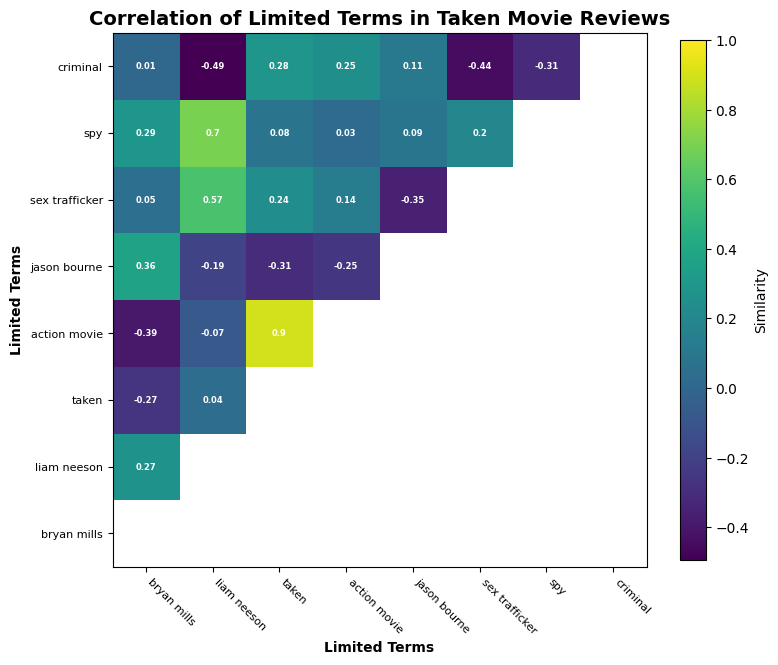

In [22]:
corrleation_heatmap = generate_masked_heatmap(correlation_matrix, term_list=term_list_corr, c = {'axis_labels':'Limited Terms','title':"Correlation of Limited Terms in Taken Movie Reviews"})
corrleation_heatmap.show()

<h2>Part 2: Key Term Evaluation within td-idf</h2>



In [205]:
c_stop_words = stopwords.words('english')
c_stop_words.extend(['movie','film','flick','like'])

In [82]:
def chunk_text(text: str, max_words=1000, overlap_words=100):
    """
    Split long text into overlapping chunks by words.
    """
    N = len(text.split())
    words = text.split()
    i = 0
    while i < N:
        j = min(i + max_words, N)
        chunk = " ".join(words[i:j])
        yield chunk
        i = j - overlap_words if j < N else j



In [86]:
## using Google NLP for entity extraction
API_KEY = data_folder= userdata.get('google_api')

def get_google_nlp_entities(extract_text, api_key):
  API_ENDPOINT = f"https://language.googleapis.com/v1/documents:analyzeEntities?key={API_KEY}"
  # Request content
  request_body = {"document": {"content": extract_text, "type": "PLAIN_TEXT"}, "encodingType": "UTF8" }
  try:
    output = {}
    response = requests.post(API_ENDPOINT, json=request_body)
    response.raise_for_status()  # Raise an exception for HTTP errors
    ## loop through the response items to capture the top results
    for e in response.json()['entities']:
      if e['salience'] >=0.0001:
        if e['name'] not in output:
          output[e['name']] ={'type':e['type'],
                              'salience': round(e['salience'],3),
                              'count': len(e['mentions'][0].keys())}
        else:
          output[e['name']]['count'] += len(e['mentions'][0].keys())
    return output
  except requests.exceptions.RequestException as e:
        print(f"Error making API request: {e}")
        if hasattr(e, 'response') and e.response is not None:
            print(f"Response content: {e.response.text}")
##NOTES
##Salience score [0.0, 1.0]
#Scores closer to 0.0: suggest the entity is less important or central to the document.
#Scores closer to 1.0: indicate the entity is highly important or central to the document.
#Score can be valuable for Information retrieval, Summarization, Content analysis
## reference: https://www.601media.com/google-salience-score-what-is-it/

In [87]:
if dev == True:
  google_extract_terms = {}
  for r in df['FileName'].unique():
    review_text = df['MovieReview_normalized2'].loc[df['FileName']==r].to_list()[0]

    google_extract_terms[r] = get_google_nlp_entities(review_text, API_KEY)

In [98]:
tokenized_data = [doc.split() for doc in df['MovieReview_normalized2']]
n = 0
for r in google_extract_terms:
  for t in list(google_extract_terms[r].keys()):
    if t not in tokenized_data[n]:
      tokenized_data[n].append(t)
    else:
      pass
  n+=1

In [99]:
df['Doc_ID'] = df['FileName'].apply(lambda x: x[4:9].replace("_", ""))

## create vocabulary dictionary for taken movie reviews
dct_taken = Dictionary(tokenized_data)

In [102]:
dct_taken.most_common(10)

[('s', 70),
 ('taken', 49),
 ('bryan', 40),
 ('the', 38),
 ('neeson', 37),
 ('action', 34),
 ('movie', 33),
 ('daughter', 32),
 ('one', 31),
 ('like', 30)]

In [140]:
## get formatted reviews for further analysis
docids,titles,text=get_corpus(df, text_col = 'MovieReview_normalized2')
print(len(text))

10


In [212]:

## generate the TF-IDF summary
transformed_vectorizer_documents, limited_tfidf = get_tfidf_results(text, df = df, top_k_results = 10, limited_list = alias_terms.keys(), custom_vocab = dct_taken, c_stop_words = c_stop_words)
limited_tfidf

,Term,Total TF-IDF,doc_count,mean_tf_idf_scores,mean_tf_idf_corpus
0,taken,49.000,10,4.900,4.900
1,bryan,43.812,9,4.868,4.381
4,neeson,37.000,10,3.700,3.700
7,mills,25.214,8,3.152,2.521
99,bourne,9.637,5,1.927,0.964
149,spy,8.046,3,2.682,0.805
361,spook,4.599,2,2.299,0.460
407,criminal,4.599,2,2.299,0.460
1401,borne,2.705,1,2.705,0.270
1407,posse,2.705,1,2.705,0.270


In [226]:
## generate the TF-IDF summary
taken_doc_term_df, taken_tfidf = get_tfidf_results(text, df = df, top_k_results = 10,  c_stop_words = c_stop_words, custom_vocab = dct_taken)
taken_tfidf

,Term,Total TF-IDF,doc_count,mean_tf_idf_scores,mean_tf_idf_corpus
0,taken,49.000,10,4.900,4.900
1,bryan,43.812,9,4.868,4.381
2,action,37.241,9,4.138,3.724
3,one,37.221,8,4.653,3.722
4,neeson,37.000,10,3.700,3.700
5,kim,34.848,6,5.808,3.485
6,daughter,32.000,10,3.200,3.200
7,mills,25.214,8,3.152,2.521
8,paris,24.000,10,2.400,2.400
9,man,20.880,5,4.176,2.088


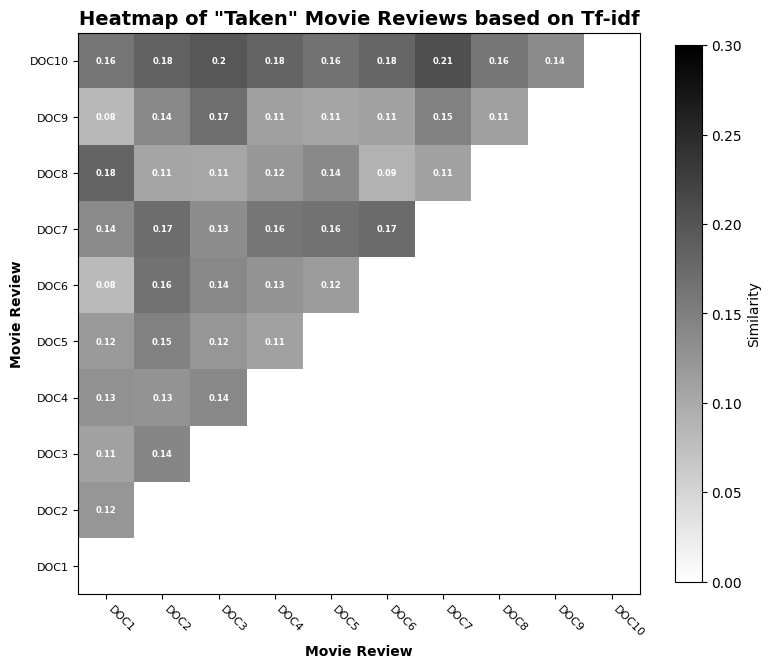

In [258]:
###############################################################################
### Calculates the Cosine Similarity the TAKEN movie reviews
## source: Dimensionality Reduction v7
## author: Jennifer Sleeman
###############################################################################

## return the similarity matrix of the documents
similarity_matrix = cosine_similarity(taken_doc_term_df, taken_doc_term_df)
document_comparison = generate_masked_heatmap(similarity_matrix, term_list=['DOC1','DOC2','DOC3','DOC4','DOC5','DOC6','DOC7','DOC8','DOC9','DOC10'], c = {'v_update':(0.00,0.3), 'cmap':'binary', 'title': 'Heatmap of "Taken" Movie Reviews based on Tf-idf'})
document_comparison.show()

To identify the likely key terms for the corpus evaluation - I want to see which terms are likely correlated to avoid potentially over-counting certain terms.

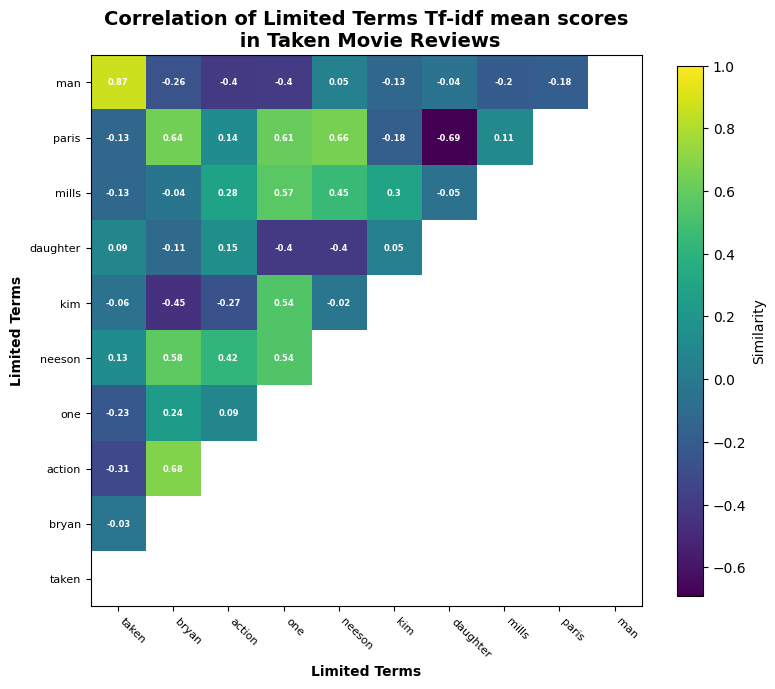

In [245]:
test1 = taken_doc_term_df.T
test1 = test1.loc[test1.index.isin(taken_tfidf['Term'].tolist())]
test1=test1.T
limited_terms_corr = test1.corr()
corrleation_heatmap = generate_masked_heatmap(limited_terms_corr, term_list=taken_tfidf['Term'].tolist(), c = {'axis_labels':'Limited Terms','title':"Correlation of Limited Terms Tf-idf mean scores\n in Taken Movie Reviews"})
corrleation_heatmap.show()


Selected term list is: taken, bryan, neeson, kim, daughter, paris

In [251]:
class_corpus_list =['taken', 'bryan', 'neeson', 'kim', 'daughter', 'paris']

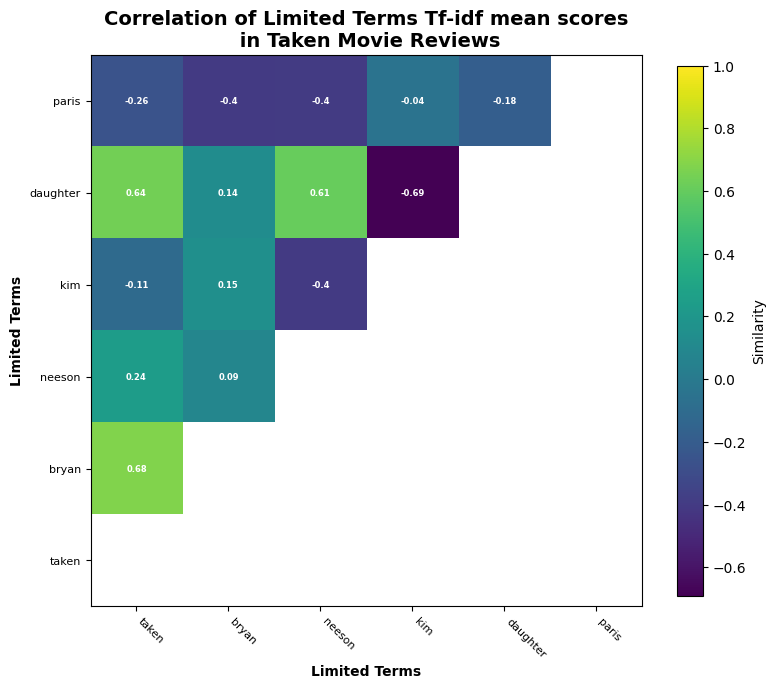

In [253]:
class_corpus_df = taken_doc_term_df.T
class_corpus_df = class_corpus_df.loc[class_corpus_df.index.isin(class_corpus_list)]
class_corpus_df = class_corpus_df.T
limited_terms_corr = class_corpus_df.corr()
corrleation_heatmap = generate_masked_heatmap(limited_terms_corr, term_list=class_corpus_list, c = {'axis_labels':'Limited Terms','title':"Correlation of Limited Terms Tf-idf mean scores\n in Taken Movie Reviews"})
corrleation_heatmap.show()